<a href="https://colab.research.google.com/github/Echo271/Capstone-Project-Gasturah/blob/main/Model_Gasturah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def split_dataset()

In [3]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 462 kB 5.1 MB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

path_train = "/content/drive/MyDrive/Situs Bersejarah/train"
path_test = "/content/drive/MyDrive/Situs Bersejarah/test"
path_val = "/content/drive/MyDrive/Situs Bersejarah/validation"

jmh_situs_train = os.listdir(path_train)
jmh_situs_test = os.listdir(path_test)
jmh_situs_val = os.listdir(path_val)

total_images = 0

for situs in jmh_situs_train:
  print(situs, " \t\t\t: ", len(os.listdir(os.path.join(path_train, situs)))+len(os.listdir(os.path.join(path_test, situs)))+len(os.listdir(os.path.join(path_val, situs))), " images")
  total_images += int(len(os.listdir(os.path.join(path_train, situs))))

print("Training Images : " + str(total_images))

Candi Prambanan  			:  2008  images
Istana Maimun  			:  2013  images
Lawang Sewu  			:  2013  images
Lembuswana  			:  2090  images
Monas  			:  2238  images
Benteng Fort Rotterdam  			:  2131  images
Candi Borobudur  			:  2265  images
Candi Ngetos  			:  2016  images
Jam Gadang  			:  386  images
Kota Tua  			:  0  images
Training Images : 13808


In [ ]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = '/content/drive/MyDrive/Situs Bersejarah/train/'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')



VALIDATION_DIR = '/content/drive/MyDrive/Situs Bersejarah/validation/'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(100,100),
	class_mode='categorical',
  batch_size=32,
  shuffle = True
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(100,100),
	class_mode='categorical',
  batch_size=32,
  shuffle=True
)

Found 1611 images belonging to 10 classes.
Found 376 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow as tf

# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

pretrained_model3 = InceptionV3(input_shape=(100,100,3),include_top=False,weights='imagenet')
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Flatten()(pretrained_model3.output)
x3 = tf.keras.layers.Dense(512, activation='relu')(x3)
x3 = tf.keras.layers.BatchNormalization()(x3)
x3 = tf.keras.layers.Dropout(0.2)(x3)
outputs3 = tf.keras.layers.Dense(10, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

# Print the model summary
model.summary()

In [ ]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=15, steps_per_epoch=len(train_generator), validation_data = validation_generator, verbose = 1, validation_steps=len(validation_generator))

KeyboardInterrupt: ignored

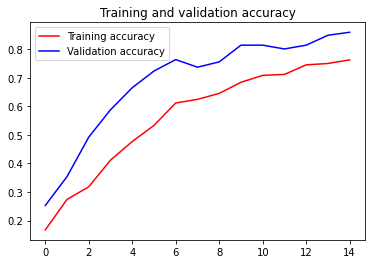

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()